# Data Analysis - Introduction to Pandas DataFrames

**Author**: [Gabriele Pompa](https://www.linkedin.com/in/gabrielepompa/): gabriele.pompa@unisi.com

# Table of contents

**TODO**

### **Resources**: 

- [_Python for Finance (2nd ed.)_](http://shop.oreilly.com/product/0636920117728.do): Sec. 5.The DataFrame Class, 5.Basic Analytics, 5.Basic Visualization, 5.The Series Class, 5.Complex Selection, 5.Concatenation, Joining, and Merging, 5.Performance Aspects.


- _[Pandas - Intro to data structures](https://pandas.pydata.org/docs/getting_started/dsintro.html#intro-to-data-structures)_ ([Series](https://pandas.pydata.org/docs/getting_started/dsintro.html#series); [DataFrame](https://pandas.pydata.org/docs/getting_started/dsintro.html#dataframe)). From _[Pandas - Getting started tutorials](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html):_ 
    - [What kind of data does pandas handle?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html), 
    - _[How do I select a subset of a `DataFrame`?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html),_ 
    - _[How to create plots in pandas?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html),_ _[How to create new columns derived from existing columns](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html),_ 
    - _[How to calculate summary statistics?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html),_ 
    - _[How to combine data from multiple tables?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/08_combine_dataframes.html)_

# Executive Summary <a name="summary"></a>

**TODO**

In [1]:
# for NumPy arrays
import numpy as np

# for Pandas Series and DataFrame
import pandas as pd

# for Matplotlib plotting
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Introduction to Pandas DataFrames <a name="DataFrame"></a>

A [Pands DataFrame](https://pandas.pydata.org/docs/getting_started/dsintro.html#dataframe) is a 2-dimensional labeled data structure with columns of potentially different types (integers, strings, floating point numbers, etc.).

You can think of it like an Excel  spreadsheet, or - knowing Pandas Series - a dict of Series objects.

# 2. Creation <a name="df_creation"></a>

DataFrames can be created using the constructor:

`
pd.DataFrame(data[, index, columns])
`

where:
- `data`: is the data content of the DataFrame. It can be a NumPy N-dim array, a Python dict of:
    - Pandas Series,
    - 1-dim NumPy arrays, 
    - Python Lists,
    - etc...
    
- `index`: (optional) is the index of the DataFrame. It can be an array-like structure (e.g. a list). If not provided, default index spans the rows of `data`. For example, if `data` is a NumPy `(n,m)` array, it is `[0,1,...,n-1]`.

- `columns`: (optional) lists the columns of the DataFrame. It can be an array-like strucutre (e.g. a list). If not provided, default columns spans the columns of `data`. For example, if `data` is a NumPy `(n,m)` array, it is `[0,1,...,m-1]`.

Here we consider the creation of a Pandas DataFrame from a 2-dimensional NumPy array (that is, a matrix). We refer to [Intro to data structures - DataFrame](https://pandas.pydata.org/docs/getting_started/dsintro.html#dataframe) for other creational paradigms and full details.

So, let's define a $10 \times 5$ matrix with columns the number from 1 to 10 raised to powers 1, 2, 3, 4, 5

In [2]:
mat = np.array([[i**k for i in range(1,11)] for k in range(1,6)]).T
mat

array([[     1,      1,      1,      1,      1],
       [     2,      4,      8,     16,     32],
       [     3,      9,     27,     81,    243],
       [     4,     16,     64,    256,   1024],
       [     5,     25,    125,    625,   3125],
       [     6,     36,    216,   1296,   7776],
       [     7,     49,    343,   2401,  16807],
       [     8,     64,    512,   4096,  32768],
       [     9,     81,    729,   6561,  59049],
       [    10,    100,   1000,  10000, 100000]])

we pass the matrix `mat` as the `data` parameter of `pd.DataFrame()`

In [3]:
df = pd.DataFrame(mat)
df

,0,1,2,3,4
0,1,1,1,1,1
1,2,4,8,16,32
2,3,9,27,81,243
3,4,16,64,256,1024
4,5,25,125,625,3125
5,6,36,216,1296,7776
6,7,49,343,2401,16807
7,8,64,512,4096,32768
8,9,81,729,6561,59049
9,10,100,1000,10000,100000


In [5]:
mat.shape

(10, 5)

The function `pd.DataFrame()` returns a Pandas DataFrame object. Each element in the table is linked to its corresponding index and column. 

Notice that:
- the `index` which is generated by default (since we didn't provide one explicitly) is `0, 1,..., 9 = mat.shape[0]-1`;
- the `columns` which are generated by default (since we didn't provide them explicitly) are `0, 1,..., 4 = mat.shape[1]-1`;

In [68]:
type(df)

pandas.core.frame.DataFrame

Notice that the explicit assignment `data=mat` is optional and equivalent to `pd.DataFrame(mat)`.

Similarly to NumPy arrays and Pandas Series, Pandas DataFrames have meta-informative attributes too. Let's have a look at some of them.

The number of elements is given by

In [7]:
df.size

50

The number of rows and columns of the DataFrame is, similarly to NumPy arrays:

In [8]:
df.shape

(10, 5)

Each column of the DataFrame may have different data-type, use `.dtypes` attribute to retrieve them (mind the plural)

In [9]:
df.dtypes

0    int32
1    int32
2    int32
3    int32
4    int32
dtype: object

Notice that a `pd.Series` is returned with each column's data-type reported as a `str` (`object` is the Pandas for `str` data-type) and linked to an index labelled as the corresponding column label in the DataFrame (another example later).

Similarly, to Series, you can directly access the index sequence:

In [72]:
df.index

RangeIndex(start=0, stop=10, step=1)

As we have seen for Series, `RangeIndex` is the kind of `[0,1,...,mat.shape[0]-1]` index which Pandas creates by default when you don't input one explicitly.

In [10]:
df.columns

RangeIndex(start=0, stop=5, step=1)

Similarly, a `[0,1,...,mat.shape[1]-1]` `RangeIndex` is created to label the columns when you don't provide them explicitly.

Of course we can give more descriptive names to the columns of our DataFrame:

In [73]:
df.columns = ['x', 'x^2', 'x^3', 'x^4', 'x^5']
df

,x,x^2,x^3,x^4,x^5
0,1,1,1,1,1
1,2,4,8,16,32
2,3,9,27,81,243
3,4,16,64,256,1024
4,5,25,125,625,3125
5,6,36,216,1296,7776
6,7,49,343,2401,16807
7,8,64,512,4096,32768
8,9,81,729,6561,59049
9,10,100,1000,10000,100000


In [74]:
df.columns

Index(['x', 'x^2', 'x^3', 'x^4', 'x^5'], dtype='object')

Now the columns that we define are a general `Index` of strings (`dtype='object'`).

As for Pandas Series, ff you want just the values (without the indexing) - that is, the original NumPy `mat` in our case - these can be accessed through the `.values` attribute

In [11]:
df.values

array([[     1,      1,      1,      1,      1],
       [     2,      4,      8,     16,     32],
       [     3,      9,     27,     81,    243],
       [     4,     16,     64,    256,   1024],
       [     5,     25,    125,    625,   3125],
       [     6,     36,    216,   1296,   7776],
       [     7,     49,    343,   2401,  16807],
       [     8,     64,    512,   4096,  32768],
       [     9,     81,    729,   6561,  59049],
       [    10,    100,   1000,  10000, 100000]])

## 2.1. Time indexes: `pd.date_range()` and `pd.to_datetime()`  <a name="df_creation"></a>

In exactly the same way we were able to define time-indexes for Pandas Series, we can do it for Pandas DataFrames.

Here we create a range of business days (denoted by the _frequency_ `freq='B'`) starting from Jan 1st 2020. The range lasts a number of `periods` equal to the rows of our DataFrame (`df.shape[0]` which would of course be the same as `mat.shape[0]`)

In [13]:
dates = pd.date_range('2020-01-01', periods=df.shape[0], freq='B') 
dates

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

The kind of time-index that is returned is a `DatetimeIndex`. We can re-index our DataFrame with this new index.

In [16]:
df.index = dates
df

,0,1,2,3,4
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


In [17]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06',
               '2020-01-07', '2020-01-08', '2020-01-09', '2020-01-10',
               '2020-01-13', '2020-01-14'],
              dtype='datetime64[ns]', freq='B')

Of course, we could have defined the DataFrame with our desired `data`, `index` and `columns` setup.

In [18]:
df = pd.DataFrame(data=mat, 
                  index=dates, 
                  columns=['x', 'x^2', 'x^3', 'x^4', 'x^5'])
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


Function `pd.to_datetime()` has already been introduced in dedicated []() notebook as a converter from a list of dates strings to a `DatetimeIndex` object.

In [42]:
pd.to_datetime(['2020-01-02', '2020-01-07', '2020-01-10'])

DatetimeIndex(['2020-01-02', '2020-01-07', '2020-01-10'], dtype='datetime64[ns]', freq=None)

As well as for Pandas Series, this function allows to filter rows of a DataFrame according to a list of strings representing dates. We'll see it shortly.

# 3. Basic plotting: `df.plot()` and `df.plot.bar()`  <a name="df_plot"></a>

As with Pandas Series, plotting a DataFrame cannot be easier

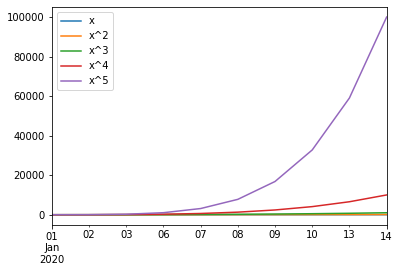

In [19]:
df.plot()

Notice that each columns, as reported in the picture legend, is translated into a line of different color, wherheas the common index is used on the x-axis to draw syncronized values.

Ok, given that our data are power functions, which grow at different speeds, it's difficult to appreciate all them together in the same plot... if we plot them straight-away. Let's plot their logs!

So let's define a new DataFrame `df_log` which has the same index and columns of the original `df`, but each element get's transformed throug a $\ln()$ function. 

We anticipate here the flexibility of NumPy's universal functions, which most can be used with `pandas.DataFrame` parameters in input (instead of `numpy.ndarray`).

_En passant,_ we re-label the columns of the `df_log` too. Notice the use of list comprehension together with the `+` operator to concatenate `str`.

In [20]:
df_log = np.log(df)
df_log.columns = ['log(' + c + ')' for c in df.columns]
df_log

,log(x),log(x^2),log(x^3),log(x^4),log(x^5)
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.693147,1.386294,2.079442,2.772589,3.465736
2020-01-03,1.098612,2.197225,3.295837,4.394449,5.493061
2020-01-06,1.386294,2.772589,4.158883,5.545177,6.931472
2020-01-07,1.609438,3.218876,4.828314,6.437752,8.047190
2020-01-08,1.791759,3.583519,5.375278,7.167038,8.958797
2020-01-09,1.945910,3.891820,5.837730,7.783641,9.729551
2020-01-10,2.079442,4.158883,6.238325,8.317766,10.397208
2020-01-13,2.197225,4.394449,6.591674,8.788898,10.986123
2020-01-14,2.302585,4.605170,6.907755,9.210340,11.512925


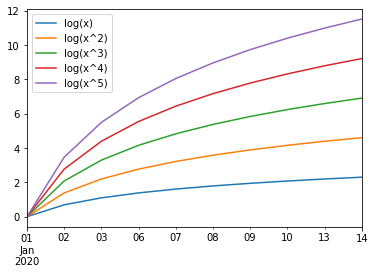

In [21]:
df_log.plot()

Now everything looks much clearer. As we did for Pandas Series, of course we can produce bar-plots (as well as the tons of [visualization styles](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) which are available in Pandas

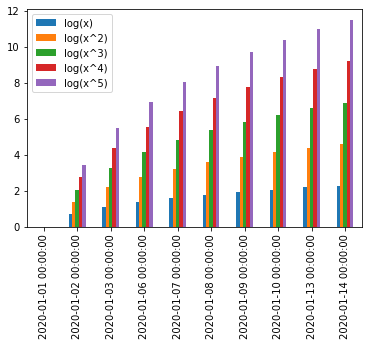

In [23]:
df_log.plot.bar()

# 4. Indexing and Slicing <a name="df_selection"></a>

In this section we describe the different possibilities that you have to access elements of a DataFrame `df`. 

Here is an overview:

- Selecting columns (using `[]`):

&nbsp;  | syntax | example
:---: | :---: | :---:
select 1 column  | `df[colName]` | `s['x^2']`  
select  $\geq 2$ columns  | `df[[listOfCols]]` | `df[['x^2', 'x^3', 'x^5']]`

- Filtering rows (all columns):

syntax | example | meaning
:---: | :---: |  :---: 
`df[logicalCondition]` | `df[df['x^2'] > 5]` | all rows s.t. values on 'x^2' col are > 5

- Select specific rows and columns using column names (using `.loc[]`):

row indexer  | col indexer | syntax | example | notes
:---: | :---: | :---: | :---: | :---: 
 label  | label | `df.loc[indexLabel, colName]` | `df.loc['2020-01-02', 'x^2']`  '|
 label  | list of labels | `df.loc[indexLabel, [listOfCols]]` | `df.loc['2020-01-02', ['x^2', 'x^3', 'x^5']]`  |
list of  labels  | ... | `df.loc[[listOfIndexLabels], ...]` | `df.loc[['a', 'c', 'd'], ...]` | cols as label or list  
list of dates strings  | ... | `df.loc[pd.to_datetime([listOfIndexLabels]), ...]` | `df.loc[pd.to_datetime(['2020-01-02', '2020-01-05']), ...]` |cols as label or list  
logical condition  | ... | `df.loc[logicalCondition, ...]` | `df.loc[df['x^2'] > 5, ...]` | cols as label or list 

- Select specific rows and columns using numerical positions in the table (using `.iloc[]`):

row indexer  | col indexer | syntax | example 
:---: | :---: | :---: | :---:
 position  | position | `df.iloc[i,m]` | `df.iloc[1, 3]`  
slice  | slice | `df.iloc[i:j:k, m:n:q]` | `df.iloc[1:3:2, 2:3]` 
list of positions  | list of positions | `df.iloc[[i,l],[m,p]]` | `df.iloc[[1,2,3], [6,5,4]]`

we consider each case in separated sections.

In [43]:
df

,x,x^2,x^3,x^4,x^5
2020-01-01,1,1,1,1,1
2020-01-02,2,4,8,16,32
2020-01-03,3,9,27,81,243
2020-01-06,4,16,64,256,1024
2020-01-07,5,25,125,625,3125
2020-01-08,6,36,216,1296,7776
2020-01-09,7,49,343,2401,16807
2020-01-10,8,64,512,4096,32768
2020-01-13,9,81,729,6561,59049
2020-01-14,10,100,1000,10000,100000


In [46]:
df.iloc[[0,3,5], [1,2]]

,x^2,x^3
2020-01-01,1,1
2020-01-06,16,64
2020-01-08,36,216


In [34]:
pd.__version__

'0.25.1'

In [36]:
x = pd.DataFrame([[1, 2], [4, 5], [7, 8]],
     index=['cobra', 'viper', 'sidewinder'],
     columns=['max_speed', 'shield'])
x

,max_speed,shield
cobra,1,2
viper,4,5
sidewinder,7,8


In [38]:
x.loc['viper']

max_speed    4
shield       5
Name: viper, dtype: int64

In [39]:
x.loc[['viper', 'sidewinder']]

,max_speed,shield
viper,4,5
sidewinder,7,8


In [41]:
df.loc[['2020-01-06']]

KeyError: "None of [Index(['2020-01-06'], dtype='object')] are in the [index]"

## 4.1. Selecting columns: `[]` <a name="df_selection_cols"></a>

## 4.2. Comparison and Logical operators <a name="df_selection_comparison_and_logical_operators"></a>

## 4.3. Conditional Selection: filtering rows <a name="df_conditional_selection"></a>

## 4.4. Selecting rows with rows and columns _names_ : `.loc[]` <a name="df_loc"></a>

## 4.5. Selecting rows with rows and columns _positional indexes_ : `.iloc[]` <a name="df_iloc"></a>

# 5. Creating New Columns <a name="df_new_cols"></a>

# 6. Basic Analytics <a name="df_analytics"></a>

## 6.1. _Vectorized_ operations <a name="df_basic_operations"></a>

## 6.2. Built-in methods <a name="df_builtin_methods"></a>

## 6.3. Interoperability with NumPy's universal functions <a name="df_ufunc"></a>

In [ ]:
df

In [ ]:
# selecting a column 
# (as if the DataFrame was a dict of the column-Series and column labels - e.g. 'x^2' - its keys)
s_x2 = df['x^2']
s_x2

In [ ]:
# observe that a pd.Series is returned
type(s_x2)

In [ ]:
# selecting more columns (a pd.DataFrame is returned)
df_x235 = df[['x^2', 'x^3', 'x^5']]
df_x235

In [ ]:
# creating a new column - from a NumPy array
df['2*x^5'] = 2 * mat[:,-1]
df

In [ ]:
# creating a new column - from a single value (note the data-type is not constrained as in NumPy arrays)
df['dummy bool'] = False
df

In [ ]:
df.dtypes

In [ ]:
# deleting a column
del df['dummy bool']
df

In [ ]:
# creating a new column - as a function of other column(s)
df['log(x^5/x^3)'] = np.log(df['x^5']/df['x^3'])
df

In [ ]:
# creating a new column - as a logical function of other column(s)
df['5x > x^2'] = 5*df['x'] > df['x^2']
df

In [ ]:
# select rows using a boolean columns
df[df['5x > x^2']]

In [ ]:
# select rows by label - a series indexed by the column labels is returned
df.loc['2020-01-01']

In [ ]:
# select a single element
df.loc['2020-01-01', 'x^2']

In [ ]:
# slice rows using labels (right label included too!)
df.loc['2020-01-01':'2020-01-03']

In [ ]:
# select single element a-la NumPy
df.iloc[0,1]

In [ ]:
# select rows a-la NumPy
df.iloc[0]

In [ ]:
# slice rows a-la NumPy (left index implicitly zero and right index is excluded)
df.iloc[:3]

In [ ]:
# computing returns (far vedere steps intermedi)
df['Ret x^2'] = df.iloc[1:]['x'] - df.iloc[:-1]['x']
df

In [ ]:
df.sum(axis=0)

In [ ]:
np.log(df[['x', 'x^2', 'x^3', 'x^4', 'x^5']])

In [ ]:
# alignment is on the union of indexes

In [ ]:
df1 = df.loc[:'2020-01-08']
df1

In [ ]:
df2 = df.loc['2020-01-04':]
df2

In [ ]:
df1 + df2